<a href="https://colab.research.google.com/github/efandresena/AIMS-Course/blob/main/mirindraf_MC4ML_Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. $\pi$ estimation with MCMC

In [1]:
import numpy as np
import matplotlib.pyplot as plt


### (a). Uniform Marcov Chain Random Walk in the square

Both x and y are limited within [-1,1] and the distrubition of their densisty is uniform within that range.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 100000
def target_function(xy):
    if np.all((-1.0 <= xy) & (xy <= 1.0)):
        return 1/4
    else:
        return 0.0


def metropolis_uniform(xy):
    dx = np.random.normal(0, 0.4, 2)
    xy_new = xy + dx
    accepted = 0
    if target_function(xy) == 0:
        p = 0
    else:
        p = target_function(xy_new) / target_function(xy)

    u = np.random.uniform()
    if u < p:
        accepted =1
        return accepted, xy_new

    else:
        return accepted, xy

xy = np.array([0.5, 0.5])
chain = [xy]
for i in range(1, N + 1):
      accepted, walk = metropolis_uniform(chain[-1])
      chain.append(walk)




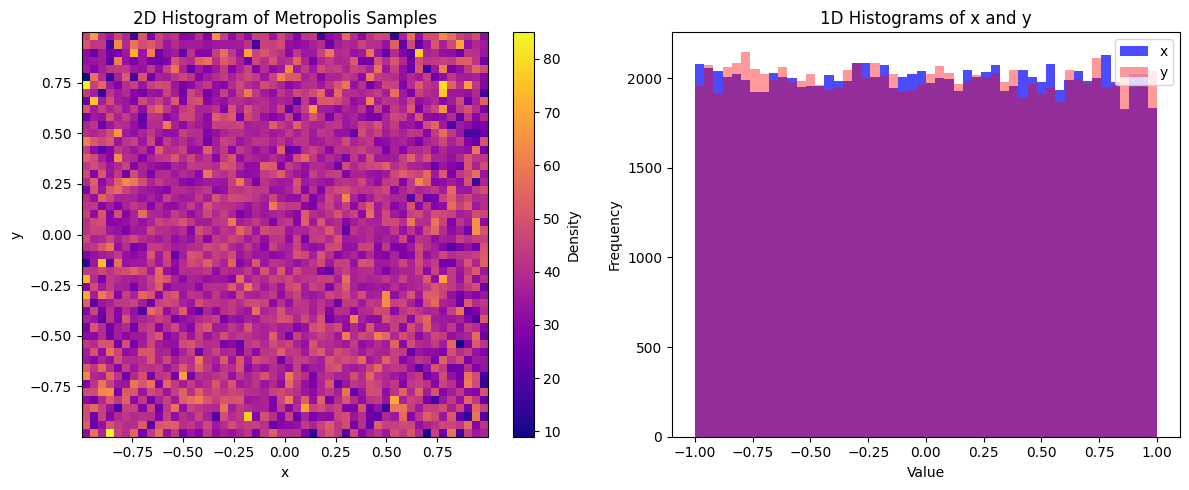

In [3]:
uniform = np.array(chain)
x_vals = uniform[:, 0]
y_vals = uniform[:, 1]


# Create two subplots next to each other
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 2D histogram
h = axes[0].hist2d(x_vals, y_vals, bins=50, cmap='plasma')
fig.colorbar(h[3], ax=axes[0], label='Density')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('2D Histogram of Metropolis Samples')

# 1D histograms of x and y
axes[1].hist(x_vals, bins=50, alpha=0.7, label='x', color='blue')
axes[1].hist(y_vals, bins=50, alpha=0.4, label='y', color='red')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
axes[1].set_title('1D Histograms of x and y')
axes[1].legend()

plt.tight_layout()
plt.show()

## (b). Convergence of the Estimator of $\pi$

Final π estimate ≈ 3.14576


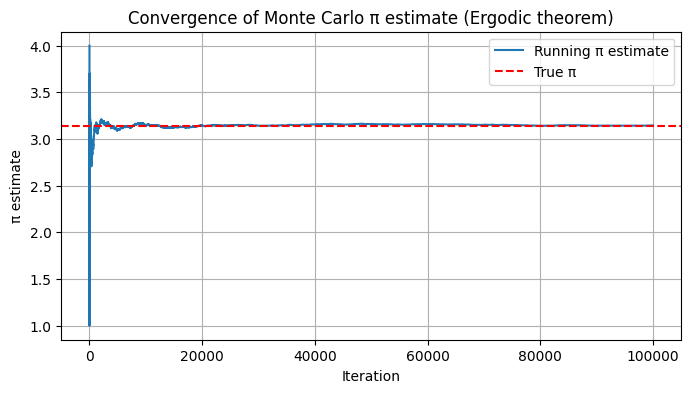

In [4]:
def generate_random_walk_in_square(N, xy):
    chain = [xy]
    pi_list = []
    ratios = [0]
    n_circle = 0
    acceptance = 0
    for i in range(1, N + 1):
        accepted, walk = metropolis_uniform(chain[-1])
        chain.append(walk)

        # computing the acceptance ratio
        acceptance += accepted
        ratio = acceptance/i
        ratios.append(ratio)

        x,y = chain[i]
        if x**2 + y**2 <= 1.0:
            n_circle += 1

        pi_est = 4 * n_circle / i
        pi_list.append(pi_est)

    return np.array(chain), np.array(pi_list), ratios

N = 100000

_ , pi_list, ratios = generate_random_walk_in_square(N, xy)

print(f"Final π estimate ≈ {pi_list[-1]}")


plt.figure(figsize=(8,4))
plt.plot(pi_list, label='Running π estimate')
plt.axhline(np.pi, color='red', linestyle='--', label='True π')

plt.xlabel('Iteration')
plt.ylabel('π estimate')
plt.title('Convergence of Monte Carlo π estimate (Ergodic theorem)')
plt.legend()
plt.grid(True)
plt.show()


#### Acceptance ratio

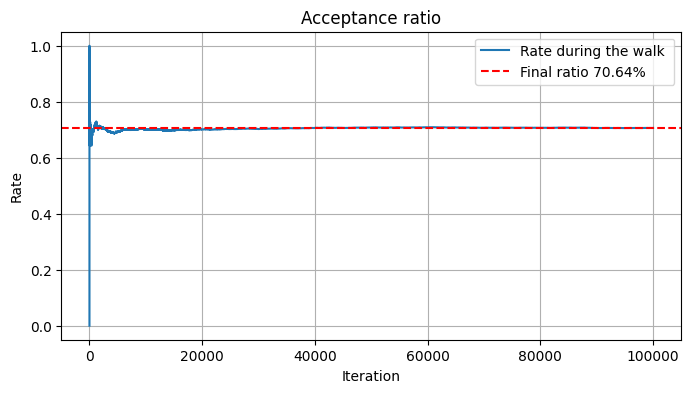

In [5]:

plt.figure(figsize=(8,4))
plt.plot(ratios, label=f'Rate during the walk ')
plt.axhline(ratios[-1], color='red', linestyle='--', label=f'Final ratio {ratios[-1]*100:.2f}%')

plt.xlabel('Iteration')
plt.ylabel('Rate')
plt.title('Acceptance ratio')
plt.legend()
plt.grid(True)
plt.show()

### (c). Error bars

##Q2. Gaussian mixture

In [6]:
n_samples = 100000

def gaussian(x, mu=0, sigma=1):
    """Compute Gaussian PDF value for x, given mean (mu) and std (sigma)."""
    coeff = 1 / (sigma * np.sqrt(2 * np.pi))
    exponent = -0.5 * ((x - mu) / sigma) ** 2
    return coeff * np.exp(exponent)

def gaussian_mixture(x, a1= 0.3, a2=0.7):
  p1 = gaussian(x, -20, 10)
  p2 = gaussian(x, 20, 10)
  return a1*p1 + a2*p2

def metropolis_gaussian(sigma, n_samples, burn_in=100):

    x = np.zeros(n_samples)
    x[0] = 0
    accepted = 0
    for i in range(1, n_samples):
        proposal = x[i-1] + np.random.normal(0, sigma)
        p_ratio = gaussian_mixture(proposal) / gaussian_mixture(x[i-1])
        alpha = min(1, p_ratio)

        # Accept or reject
        if np.random.rand() < alpha:
            x[i] = proposal
            accepted += 1
        else:
            x[i] = x[i-1]

      # computing the acceptance ratio

    ratio = accepted/n_samples


    return x[burn_in:], ratio

data_1, ratio_1 = metropolis_gaussian(1, n_samples)
data_500, ratio_500 = metropolis_gaussian(500, n_samples)
data_8, ratio_8 = metropolis_gaussian(8, n_samples)

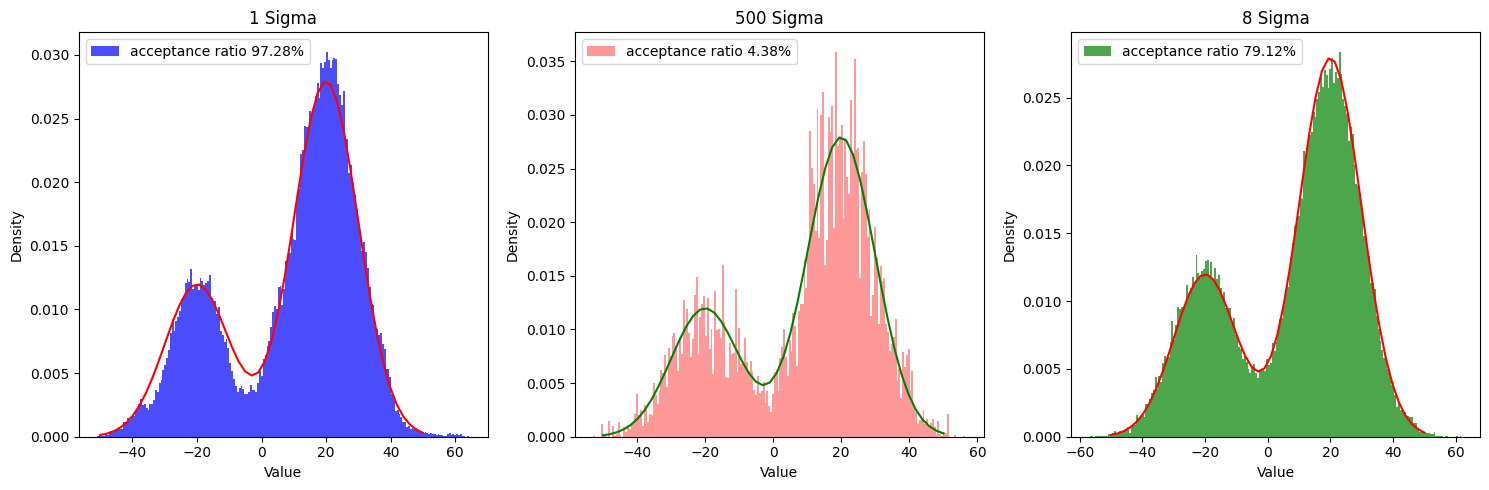

In [7]:
# Create two subplots next to each other
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
xlim = np.linspace(-50,50)
#  histogram
axes[0].hist(data_1, bins=200, alpha=0.7,label=f'acceptance ratio {ratio_1*100:.2f}%', color='blue', density=True)
axes[0].plot(xlim, gaussian_mixture(xlim), color = 'red')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')
axes[0].set_title('1 Sigma')
axes[0].legend()



axes[1].hist(data_500, bins=200, alpha=0.4, label=f'acceptance ratio {ratio_500*100:.2f}%', color='red', density=True)
axes[1].plot(xlim, gaussian_mixture(xlim), color = 'green')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')
axes[1].set_title('500 Sigma')
axes[1].legend()

# 1D histograms of x and y

axes[2].hist(data_8, bins=200, alpha=0.7,  label=f'acceptance ratio {ratio_8*100:.2f}%', color='green', density=True)
axes[2].plot(xlim, gaussian_mixture(xlim), color = 'red')
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Density')
axes[2].set_title('8 Sigma')
axes[2].legend()

plt.tight_layout()
plt.show()

Miteny ny sary

## Q3. Bayesian linear fit

In [8]:
def linear(x):
  z = np.random.normal()
  return x + z

data = []
features = []
for _ in range(50):
  x = np.random.uniform(-10, 10)
  features.append(x)
  data.append(linear(x))

data = np.array(data)


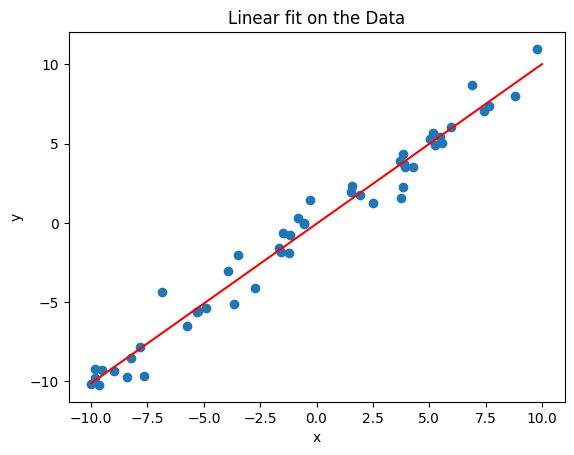

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(np.array(features).reshape(-1,1), data)

intercept = model.intercept_
slope = model.coef_[0]
def pred(x):
  return slope*x + intercept
xlim= np.linspace(-10, 10)
plt.scatter(features, data)
plt.plot(xlim, pred(xlim), color='red')
plt.title('Linear fit on the Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
intercept, slope

(np.float64(-0.05400270420428965), np.float64(1.0064926202192201))

The likelihood $p(D|θ)$ for this model .

From the assumption that y = ax+b+$\sigma$z  → $y \sim N(ax+b , \sigma)$.
So  for the Likelihood :

\begin{align}
p(D|\theta)
&= \prod_{i=1}^n
\frac{1}{\sigma \sqrt{2\pi}}
\exp\!\left(
-\frac{(y_i - (ax_i + b))^2}{2\sigma^2}
\right) \\[6pt]
&= (\sigma \sqrt{2\pi})^{-n}
\exp\!\left(
-\frac{1}{2\sigma^2}
\sum_{i=1}^n (y_i - ax_i - b)^2
\right) \\[6pt]
\end{align}

To get the prior

We have chosen the hyper-parameter from the original data 🇰
\begin{align*}
\hat a = 1 \text{ , }\hat \sigma_a = 1\\
\hat b = 0 \text{ , }\hat \sigma_b = 1 \\
\hat \sigma = 1 \text{ , }\hat \sigma_{\sigma} = 1 \\
\end{align*}


\begin{align}
p(\theta)
&= p(a)\,p(b)\,p(\sigma) \\[6pt]
&=
\frac{1}{\sqrt{2\pi}}
\exp\!\left(
-\frac{(a-1)^2}{2}
\right)
\cdot
\frac{1}{\sqrt{2\pi}}
\exp\!\left(
-\frac{b^2}{2}
\right)
\cdot
\frac{1}{\sqrt{2\pi}}
\exp\!\left(
-\frac{(\sigma-1)^2}{2}
\right) \\[6pt]
&= (\sqrt{2\pi})^{-3}
\exp\!\left(
-\frac{(a-1)^2}{2}
-\frac{b^2}{2}
-\frac{(\sigma-1)^2}{2}
\right)\\
&= (\sqrt{2\pi})^{-3}
\exp\!\left(
-\frac{(a-1)^2
-b^2
-(\sigma-1)^2}{2}
\right)
\end{align}

For the unormalized posterior

\begin{align}
p(\theta|D)
&\propto p(D|\theta)\,p(\theta) \\[6pt]
&\propto
(\sqrt{2\pi}\sigma)^{-n}
\exp\!\left(
-\frac{1}{2\sigma^2}
\sum_{i=1}^n (y_i - ax_i - b)^2
\right)(\sqrt{2\pi})^{-3}
\exp\!\left(
-\frac{(a-1)^2
-b^2
-(\sigma-1)^2}{2}
\right) \\[6pt]
\end{align}


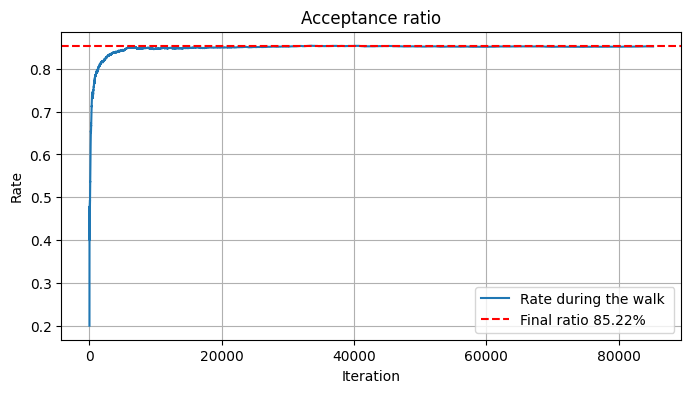

In [61]:
# Algorithm that sample from the posterior

def unormalized_posterior(Y, X, thetas):
  n = len(Y)
  Y = np.asarray(Y)
  X = np.asarray(X)
  a , b ,sigma = thetas
  R = Y - a*X - b
  abc = (a-1)**2 - b**2 - (np.abs(sigma)-1)**2
  post = -n*np.log(np.abs(sigma)) - (2*sigma**2)**(-1)*R.T@R - abc/2
  return post

def metropolis_algorithm(Y, X, samples = 100000):
  chains = [np.array([0.24114767, -0.40449703, 0.41622711])]
  accepted = 0
  ratio = 0
  ratios = []
  for i in range(1,samples):
    #propose a move
    old_abc = chains[i-1]
    move = np.random.normal(0,0.01, (3,))
    new_abc = old_abc + move

    log_p = unormalized_posterior(Y, X, new_abc) -  unormalized_posterior(Y, X, old_abc)
    logu = np.log(np.random.uniform())
    if  logu<=log_p:
        old_abc = new_abc
        accepted+=1
        ratio = accepted/i
        ratios.append(ratio)
    chains.append(old_abc)
  return ratios,chains

ratios, chain = metropolis_algorithm(data, features)


plt.figure(figsize=(8,4))
plt.plot(ratios, label=f'Rate during the walk ')
plt.axhline(ratios[-1], color='red', linestyle='--', label=f'Final ratio {ratios[-1]*100:.2f}%')

plt.xlabel('Iteration')
plt.ylabel('Rate')
plt.title('Acceptance ratio')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
chain_mx = np.array(chain)

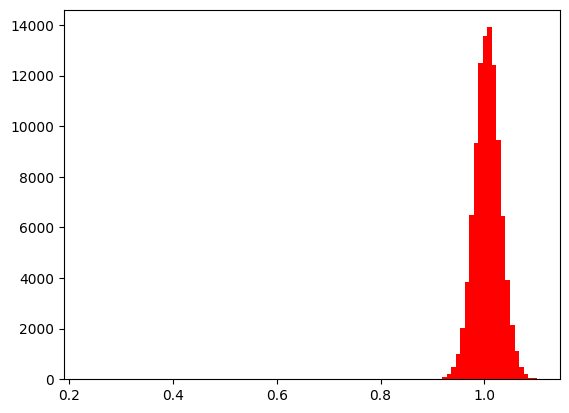

In [63]:
plt.hist(chain_mx[:,0], bins=100, color='red')
plt.show()


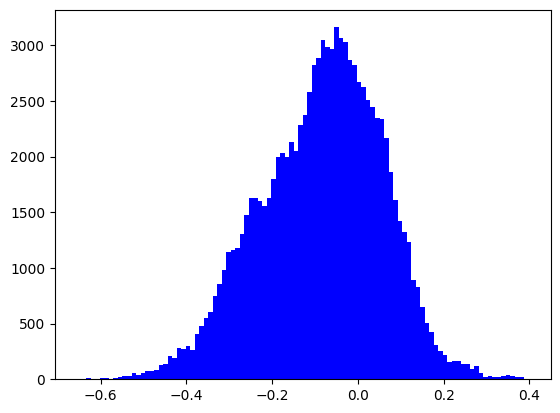

In [64]:
plt.hist(chain_mx[:,1], bins=100, color='blue')
plt.show()

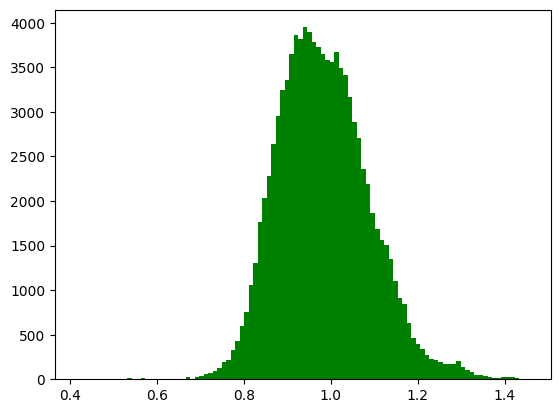

In [65]:
plt.hist(chain_mx[:,2], bins=100, color='green')
plt.show()